Streaming output truncated to the last 5000 lines.
[0.0002 0.02  ]
[0.0006 0.04  ]
[0.0012 0.06  ]
[0.002 0.08 ]
[0.003 0.1  ]
[0.0042 0.12  ]
[0.0056 0.14  ]
[0.0072 0.16  ]
[0.009 0.18 ]
[0.011 0.2  ]
[0.0132 0.22  ]
[0.0156 0.24  ]
[0.0182 0.26  ]
[0.021 0.28 ]
[0.024 0.3  ]
[0.0272 0.32  ]
[0.0306 0.34  ]
[0.0342 0.36  ]
[0.038 0.38 ]
[0.042 0.4  ]
[0.0462 0.42  ]
[0.0506 0.44  ]
[0.0552 0.46  ]
[0.06 0.48]
[0.065 0.5  ]
[0.0702 0.52  ]
[0.0756 0.54  ]
[0.0812 0.56  ]
[0.087 0.58 ]
[0.093 0.6  ]
[0.0992 0.62  ]
[0.1056 0.64  ]
[0.1122 0.66  ]
[0.119 0.68 ]
[0.126 0.7  ]
[0.1332 0.72  ]
[0.1406 0.74  ]
[0.1482 0.76  ]
[0.156 0.78 ]
[0.164 0.8  ]
[0.1722 0.82  ]
[0.1806 0.84  ]
[0.1892 0.86  ]
[0.198 0.88 ]
[0.207 0.9  ]
[0.2162 0.92  ]
[0.2256 0.94  ]
[0.2352 0.96  ]
[0.245 0.98 ]
[0.255 1.   ]
[0.2652 1.02  ]
[0.2756 1.04  ]
[0.2862 1.06  ]
[0.297 1.08 ]
[0.308 1.1  ]
[0.3192 1.12  ]
[0.3306 1.14  ]
[0.3422 1.16  ]
[0.354 1.18 ]
[0.366 1.2  ]
[0.3782 1.22  ]
[0.3906 1.24  ]
[0.4032

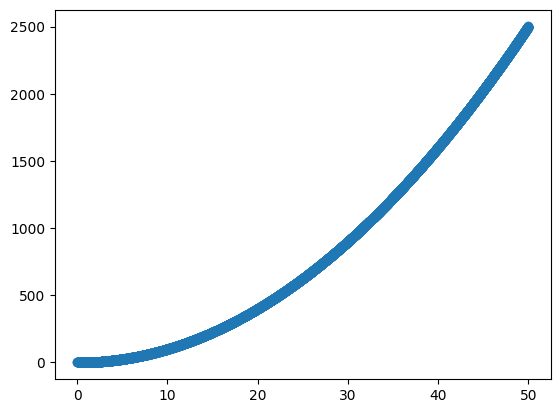

In [20]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

#Function to return dot product of two vectors(Arrays)
def dot_product(a,b,order):
  return np.dot(a[1:order],b[0:order-1])

#Function to approximate differential equation solution using forward euler method
def fwdeuler():
  #Forward Euler method
  g=lambda t,x:eval(f)
  print(g(0,1))
  t=0
  #Lists to plot graphs
  x_coord=[]
  t_coord=[]
  #While loop to iterate from 0 to t_max
  while t<t_max:
    #Calculate nth derivative using dot product of vectors
    x[n]=g(t,x[0])-dot_product(x,coef,n)
    x[n]/=coef[n-1]
    #Updating other derivates of x
    for i in range(n-1,-1,-1):
      x[i]+=t_delta*x[i+1]
    print(x)
    t+=t_delta
    x_coord.append(x[0])
    t_coord.append(t)
  #plotting the graph
  plt.scatter(t_coord,x_coord)
  plt.show

#Function to approximate differential equation solution using runge-kutta 2 method
def rk2():
  g=lambda t,x:eval(f)
  #xp is a vector which is the predictive guess of x(t+delta_t)
  xp=np.copy(x)
  t=0
  #Lists to plot graphs
  x_coord=[]
  t_coord=[]
  #While loop to iterate from 0 to t_max
  while t<t_max:
    #Finding xp like we did in Eulers method
    xp[n]=g(t,x[0])-dot_product(x,coef,n)
    xp[n]/=coef[n-1]

    for i in range(n-1,-1,-1):
      xp[i]+=t_delta*xp[i+1]
    #derivatives of x are calculated with average of x, and xp
    x[n]=(g(t,x[0])+g(t,xp[0]))/2-dot_product(x,coef,n)
    x[n]/=coef[n-1]
    for i in range(n-1,-1,-1):
      x[i]+=t_delta*(x[i+1]+xp[i+1])/2
    print(x)
    t+=t_delta
    x_coord.append(x[0])
    t_coord.append(t)
  #Plotting the graph
  plt.scatter(t_coord,x_coord)
  plt.show

#Main function to take input and call other functions
def main():
  global n,l,coef,f,x,t_max,t_delta
  global t
  n=int(input("Enter order: "))
  l=list(map(float,input("Enter coefficients").split()))
  t=0
  coef=np.array(l)
  l=list(map(float,input("Enter initial values").split()))
  l.append(0)
  x=np.array(l)
  t_delta=float(input("Enter time-step"))
  t_max=float(input("Enter final point"))

  global f
  f=input("Enter f(x,t)")
  flag=int(input("Enter 1 for forward euler, 2 for rk2"))
  if flag==1:
    fwdeuler()
  elif flag==2:
    rk2()
  else:
    print("Wrong Input")
main()